## Importing Packages

In [60]:
import os
import sys
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
import matplotlib.pyplot as plt
import string
import re
import numpy as np
import itertools
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [61]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


## Data Undersatding

In [62]:
df['category'].value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

In [63]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Text Preprocessing: Tokenization

In [64]:
#tokenizing the text data in the 'text_' column of df
corpus = [word_tokenize(doc) for doc in df['text_']]
print(corpus[0:4])

[['Love', 'this', '!', 'Well', 'made', ',', 'sturdy', ',', 'and', 'very', 'comfortable', '.', 'I', 'love', 'it', '!', 'Very', 'pretty'], ['love', 'it', ',', 'a', 'great', 'upgrade', 'from', 'the', 'original', '.', 'I', "'ve", 'had', 'mine', 'for', 'a', 'couple', 'of', 'years'], ['This', 'pillow', 'saved', 'my', 'back', '.', 'I', 'love', 'the', 'look', 'and', 'feel', 'of', 'this', 'pillow', '.'], ['Missing', 'information', 'on', 'how', 'to', 'use', 'it', ',', 'but', 'it', 'is', 'a', 'great', 'product', 'for', 'the', 'price', '!', 'I']]


In [65]:
# flattening the list of tokenized words contained in the corpus list
flattenedcorpus_tokens = pd.Series(list(itertools.chain(*corpus)))
print(flattenedcorpus_tokens.shape)

(3099953,)


In [66]:
tokens_unique = pd.Series(flattenedcorpus_tokens.unique())

### Dealing with Stop words + lowercase

In [67]:
# getting common stop words in english that we'll remove during tokenization/text normalization
stop_words = stopwords.words('english')

tokens_no_stop_words = [x.lower() for x in tokens_unique if ((x.isalpha()) & (x not in stop_words)) ]
tokens_no_stop_words[:10]

['love',
 'well',
 'made',
 'sturdy',
 'comfortable',
 'i',
 'love',
 'very',
 'pretty',
 'great']

In [68]:
len(tokens_no_stop_words)

47953

In [69]:
df['tok_norm'] = df['text_'].apply(first_step_normalizer)
df.head()

NameError: name 'first_step_normalizer' is not defined

In [ ]:
norm_toks_flattened = pd.Series(list(
    itertools.chain(*df['tok_norm'])))
new_dictionary = norm_toks_flattened.unique()
print(len(new_dictionary))

In [ ]:
print(len(dictionary))

- Process removed 22.500 features

## Text Preprocessing: Lemmatization

#### We created function which takes in untokenized document and returns fully normalized token list

In [ ]:
def process_doc(doc):

    wnl = WordNetLemmatizer()

    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
        
    # remove stop words and punctuations, then lower case
    doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok not in stop_words)) ]

    # creates list of tuples with tokens and POS tags in wordnet format
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
    doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]
    
    return doc_norm

### Applying text Tokenization/Normalization to whole body of df

In [ ]:
fully_normalized_corpus = df['text_'].apply(process_doc)

In [ ]:
fully_normalized_corpus.head()

In [ ]:
flattened_fully_norm = pd.Series(list(itertools.chain(*fully_normalized_corpus)))
len(flattened_fully_norm.unique())

In [ ]:
flattened_fully_norm

In [ ]:
# flattening the lists
fnc_output = fully_normalized_corpus.apply(" ".join)
fnc_output

# Exploratory Data Analysis

In [70]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


### Distribution Ratings by Category

In [71]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

In [72]:
df['category'].value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

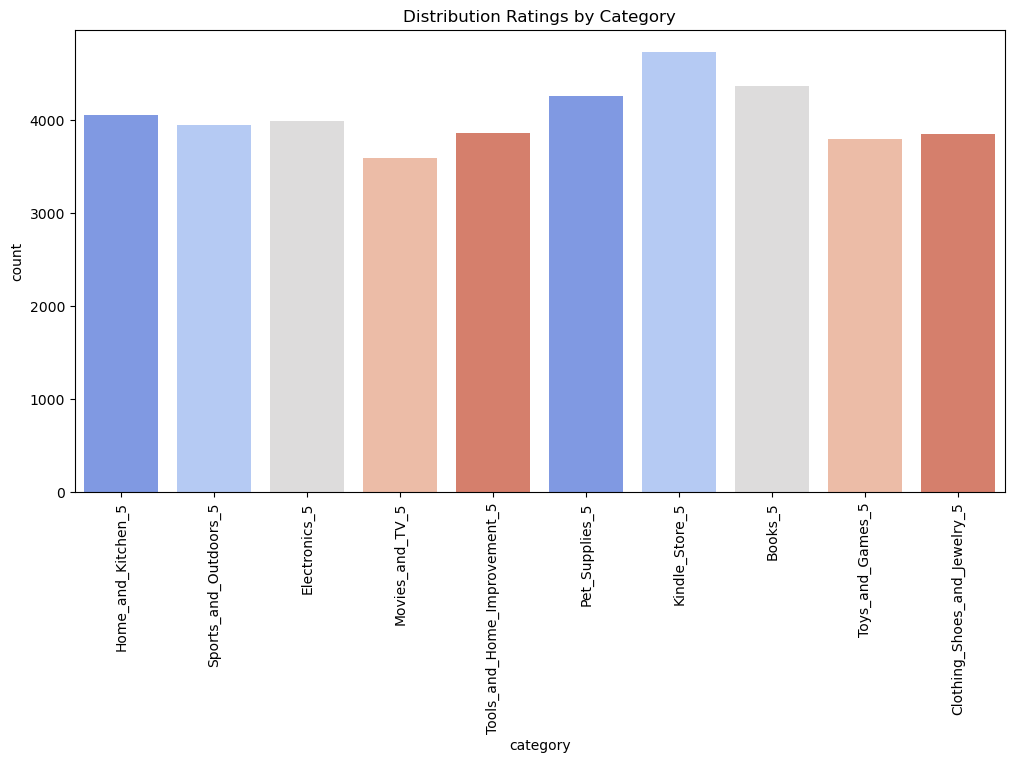

In [84]:
# Visualizing the distribution of ratings by category
colors = sns.color_palette("coolwarm", len(most_negatively_reviewed))

plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df, palette=colors)
plt.title('Distribution Ratings by Category')
plt.xticks(rotation=90)
plt.show()

## Most Positively and Negatively Reviewed Products by Category

In [74]:
# Grouping data by category and calculating the average rating for each product
category_avg_ratings = df.groupby('category')['rating'].mean().reset_index()

In [75]:
# Getting the most negatively reviewed products
most_negatively_reviewed = category_avg_ratings.sort_values('rating').head(5)

In [76]:
# Getting the most positive reviewed products
most_positively_reviewed = category_avg_ratings.sort_values('rating', ascending=False).head(5)

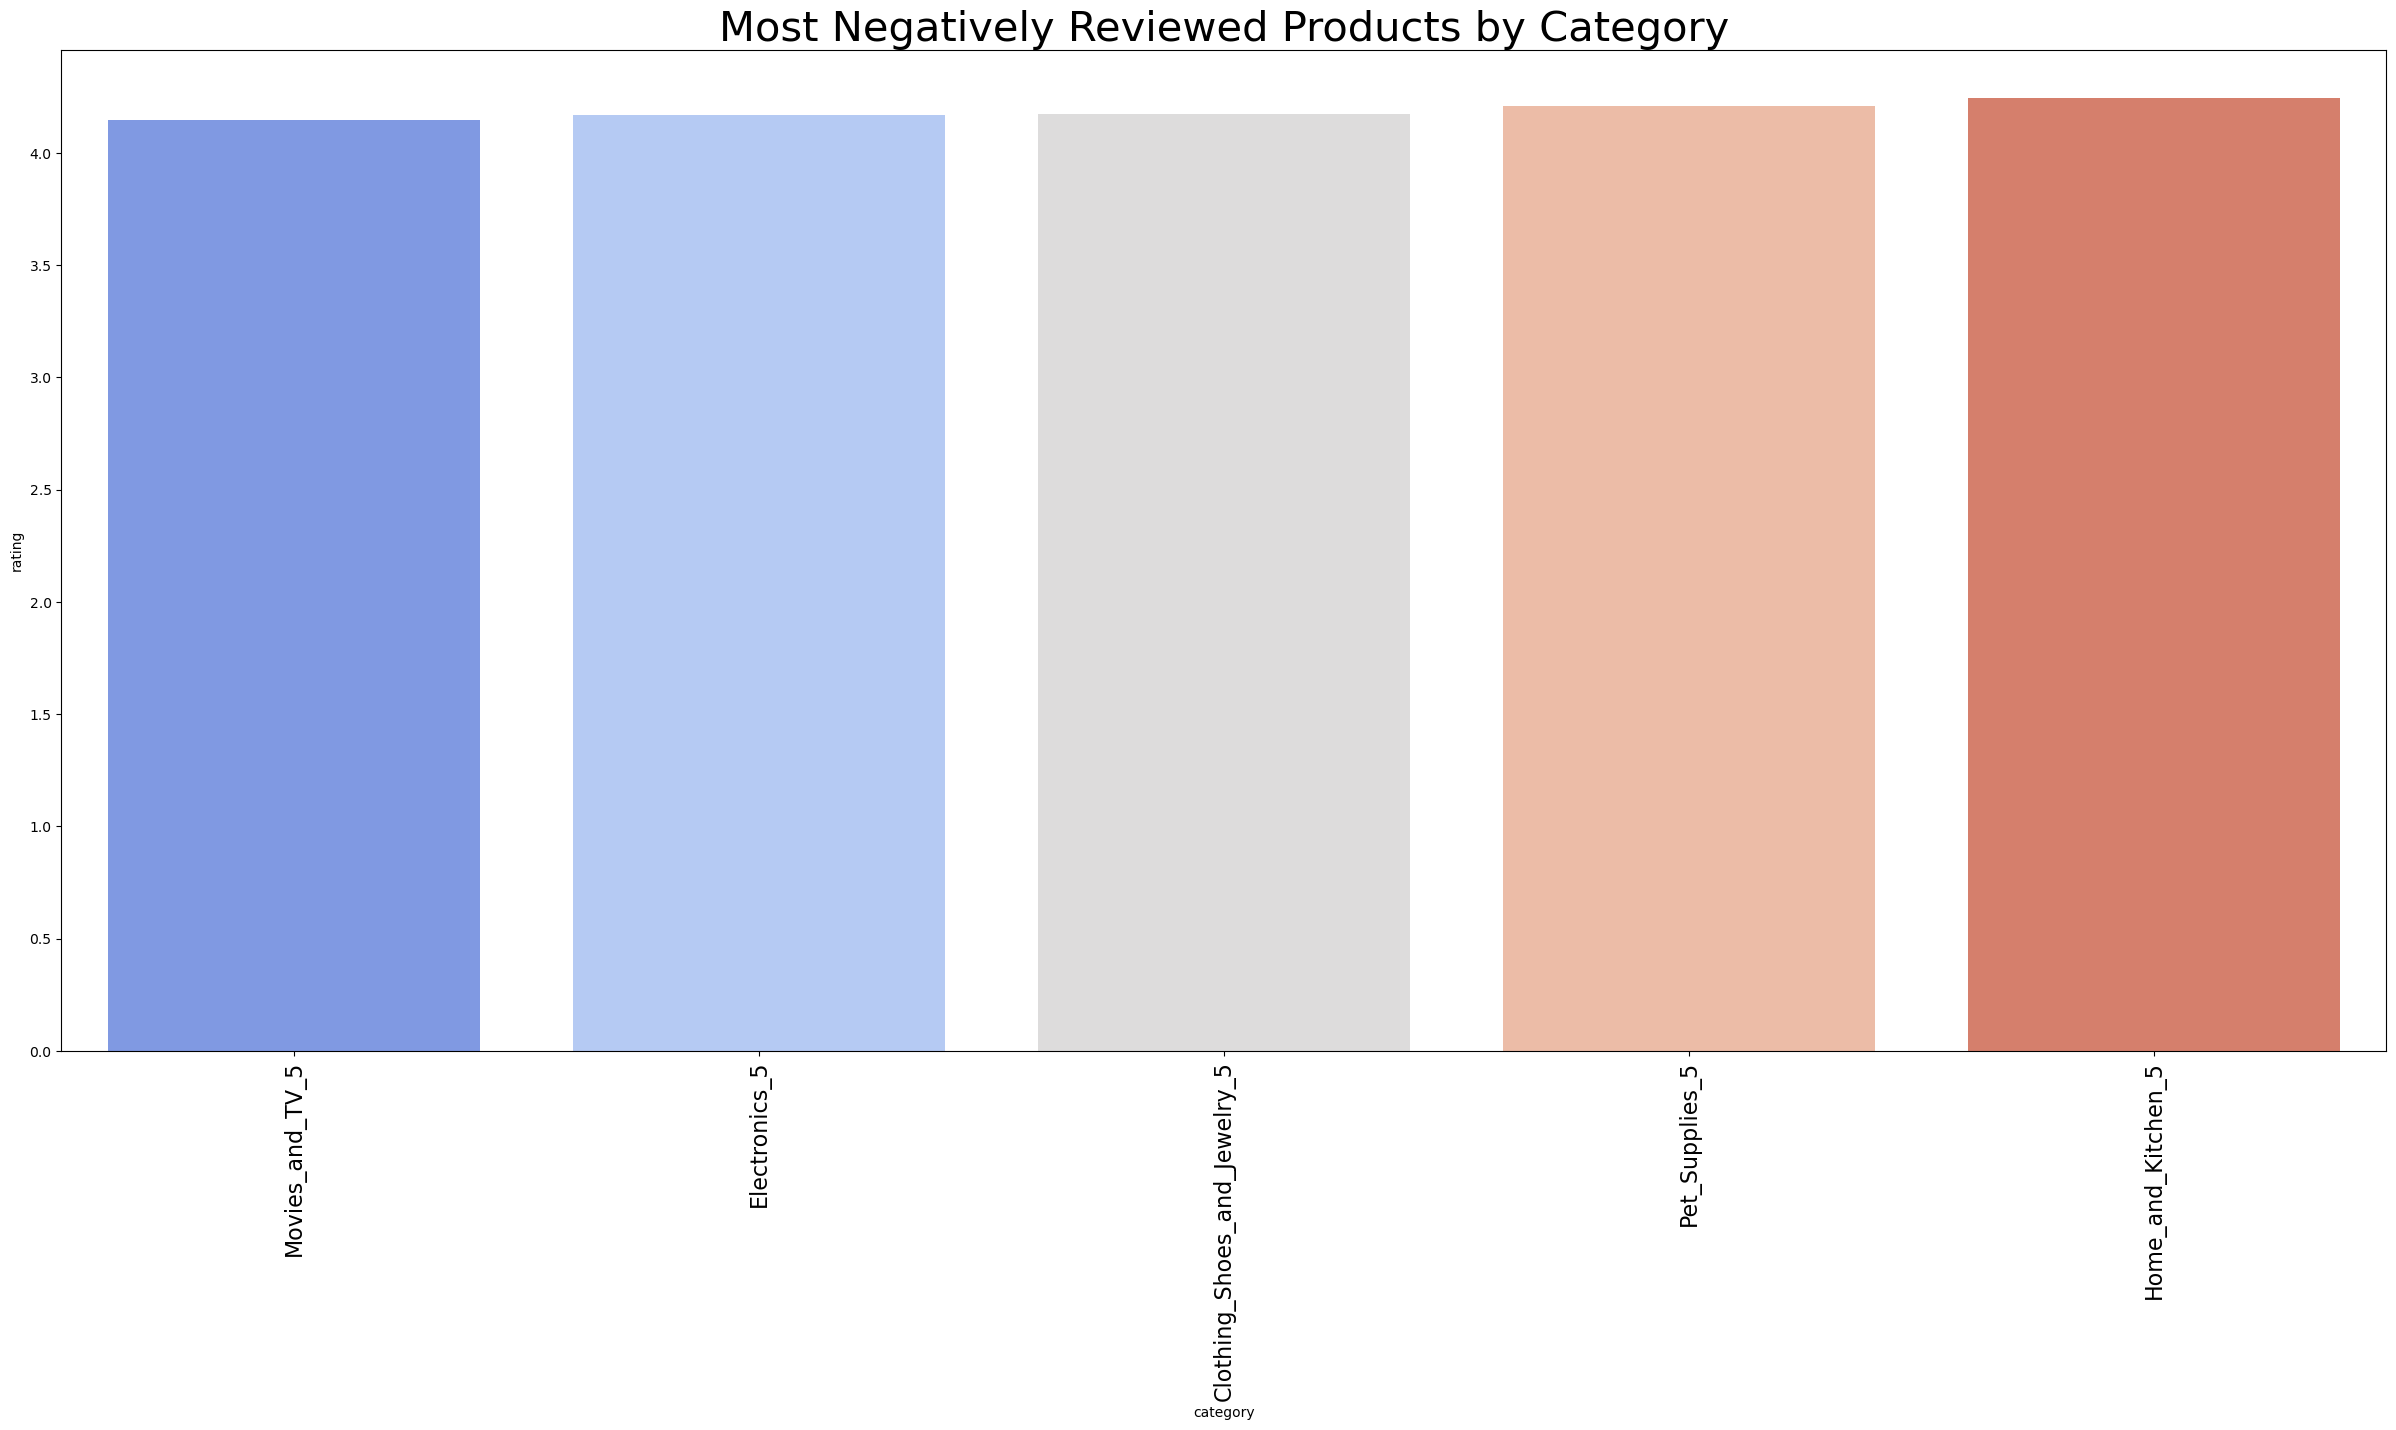

In [77]:
# Visualizing the most negatively reviewed products
colors = sns.color_palette("coolwarm", len(most_negatively_reviewed))

plt.figure(figsize=(30, 13))
sns.barplot(x='category', y='rating', data=most_negatively_reviewed, palette=colors)
plt.title('Most Negatively Reviewed Products by Category', fontsize=30)
plt.xticks(rotation=90, fontsize=16)
plt.show()

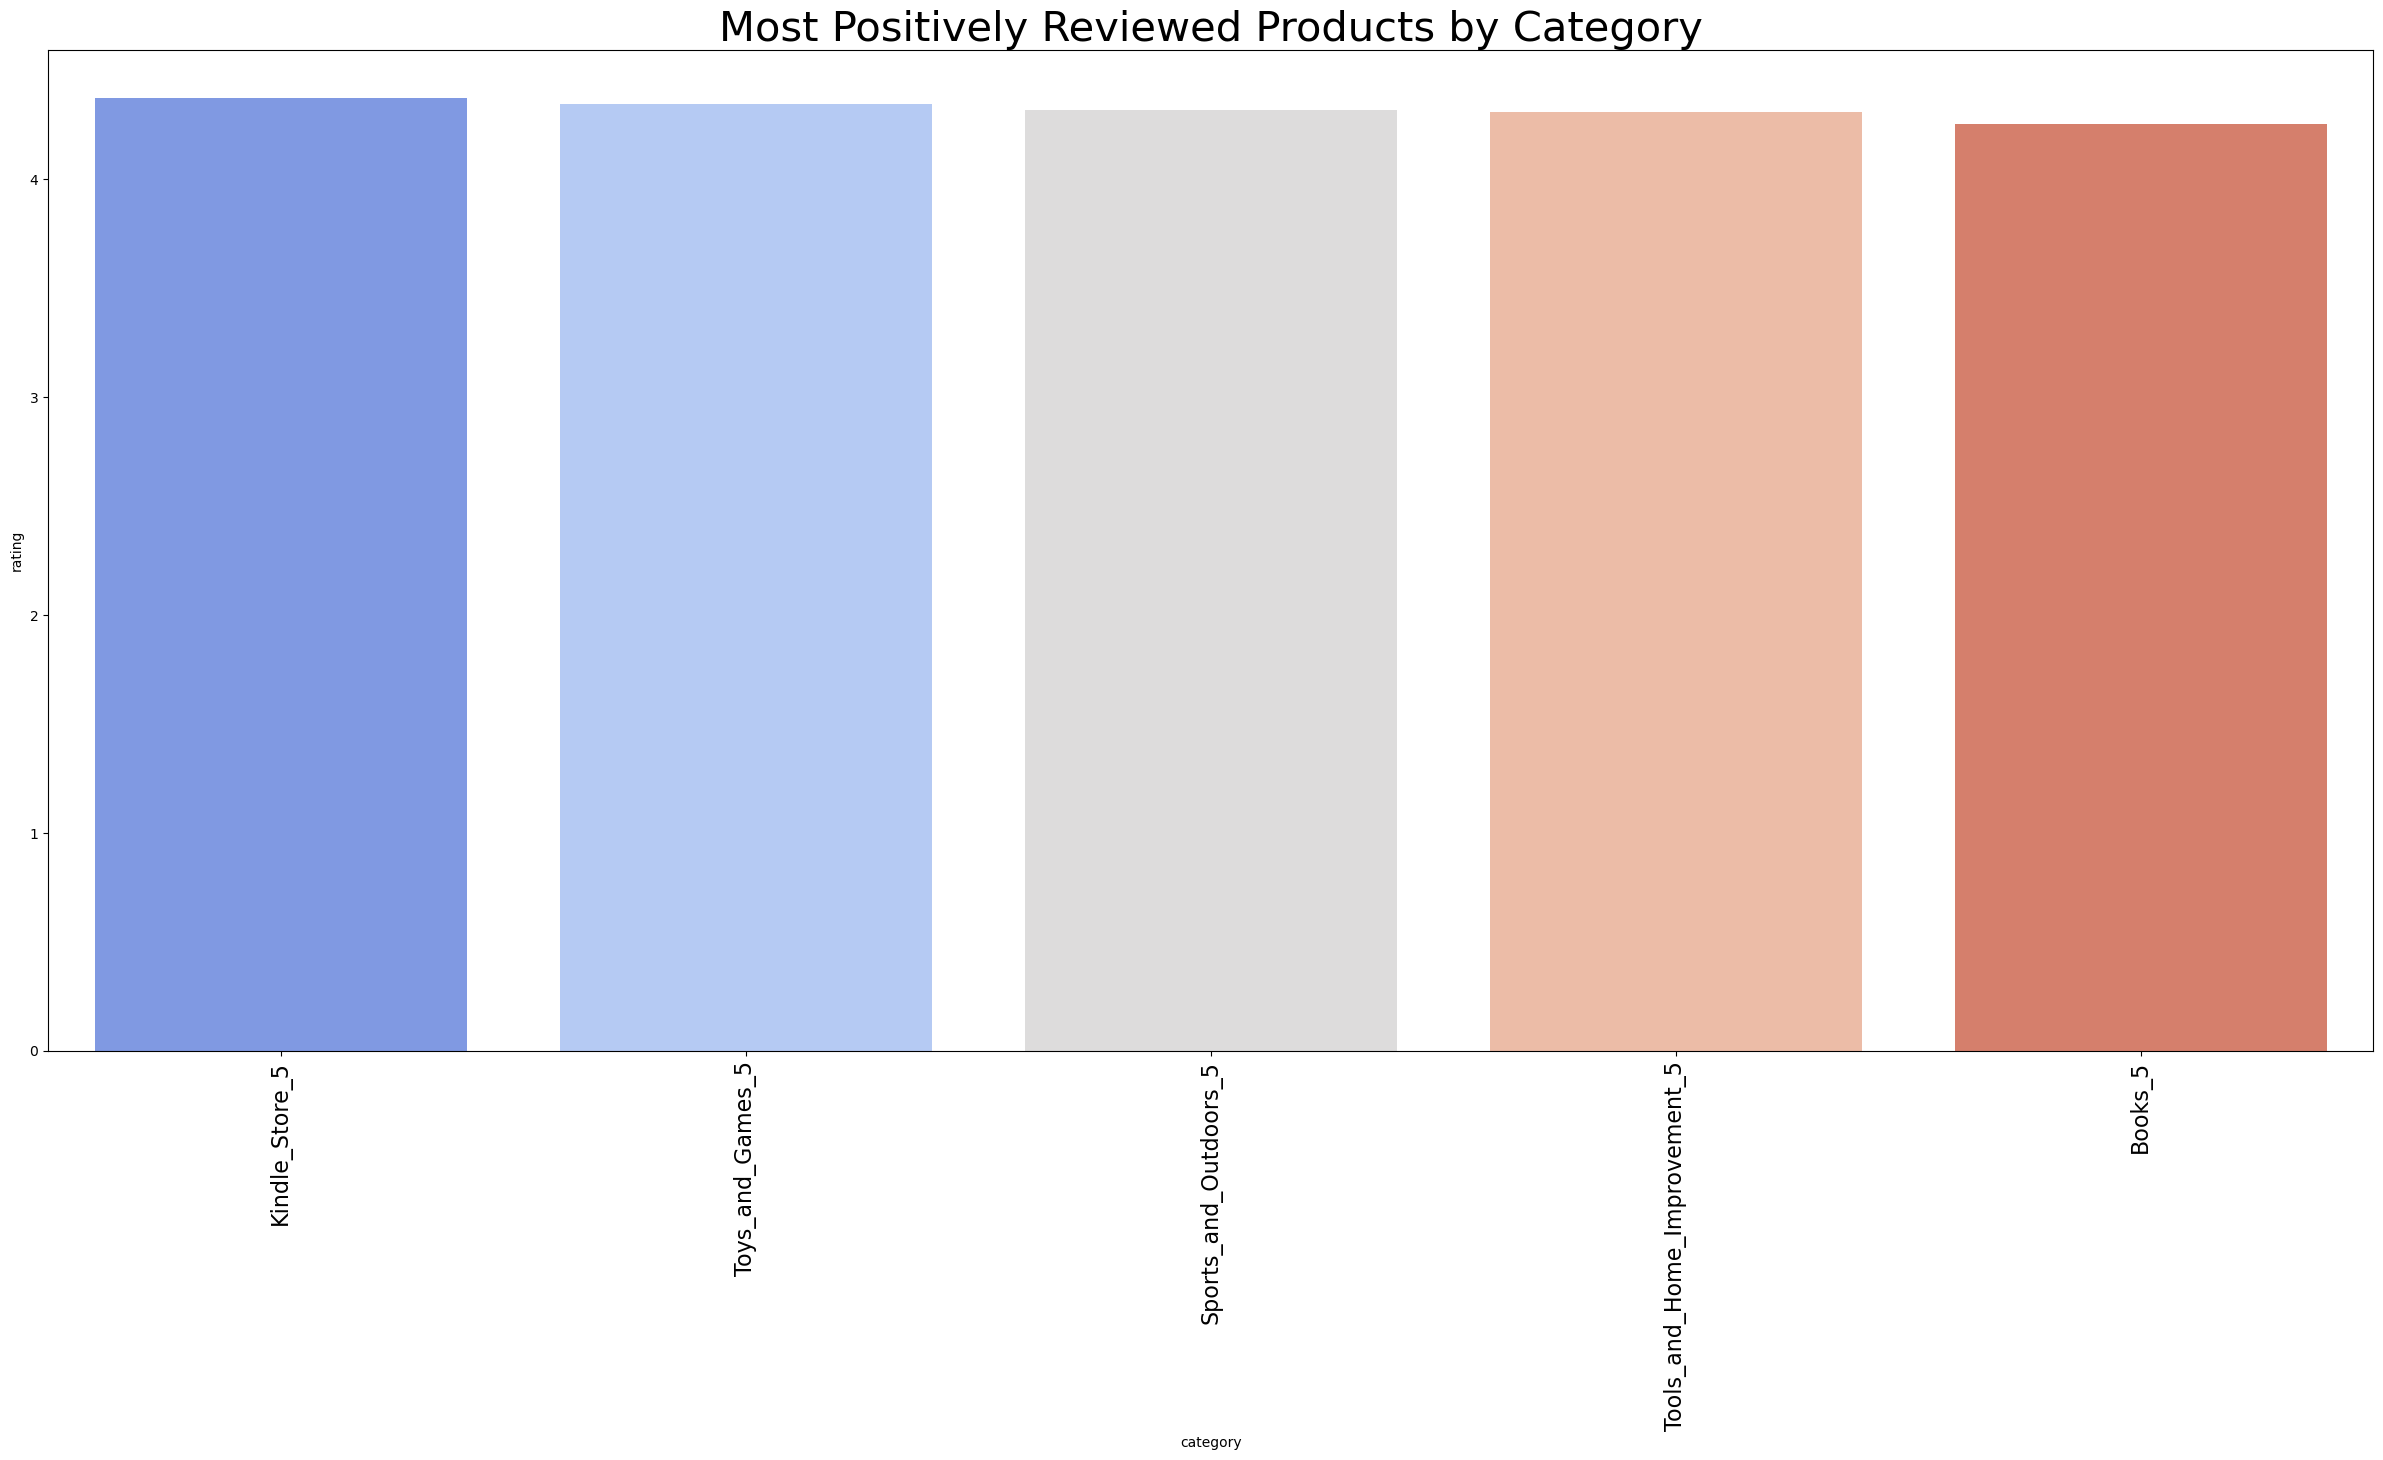

In [78]:
# Visualizing the most positively reviewed products
plt.figure(figsize=(30, 13))
sns.barplot(x='category', y='rating', data=most_positively_reviewed, palette=colors)
plt.title('Most Positively Reviewed Products by Category', fontsize=30)
plt.xticks(rotation=90, fontsize=16)
plt.show()

### Distribution of Ratings by Label

In [79]:
# Calculate the distribution of ratings for each label
label_rating_distribution = df.groupby(['label', 'rating']).size().unstack(fill_value=0)

<Figure size 3000x1300 with 0 Axes>

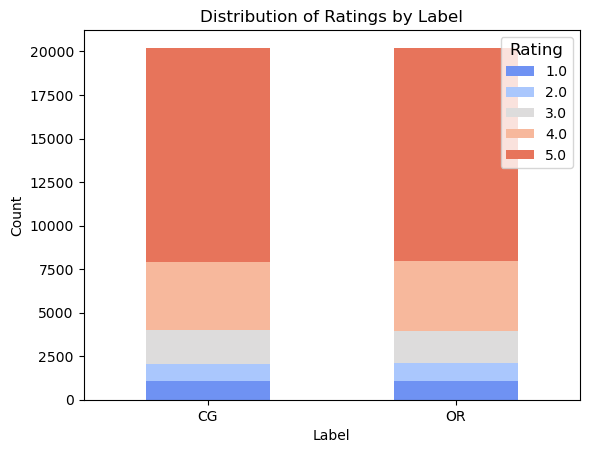

In [80]:
# Plotting a stacked bar chart to visualize the distribution of ratings for each label
colors = sns.color_palette("coolwarm", n_colors=5)


plt.figure(figsize=(30, 13))
label_rating_distribution.plot(kind='bar', stacked=True, color=colors)
plt.title('Distribution of Ratings by Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Rating', labels=[1.0, 2.0, 3.0, 4.0, 5.0], loc='upper right', title_fontsize='12')
plt.show()

- Evenly distributed

### Distribution of labels across different categories

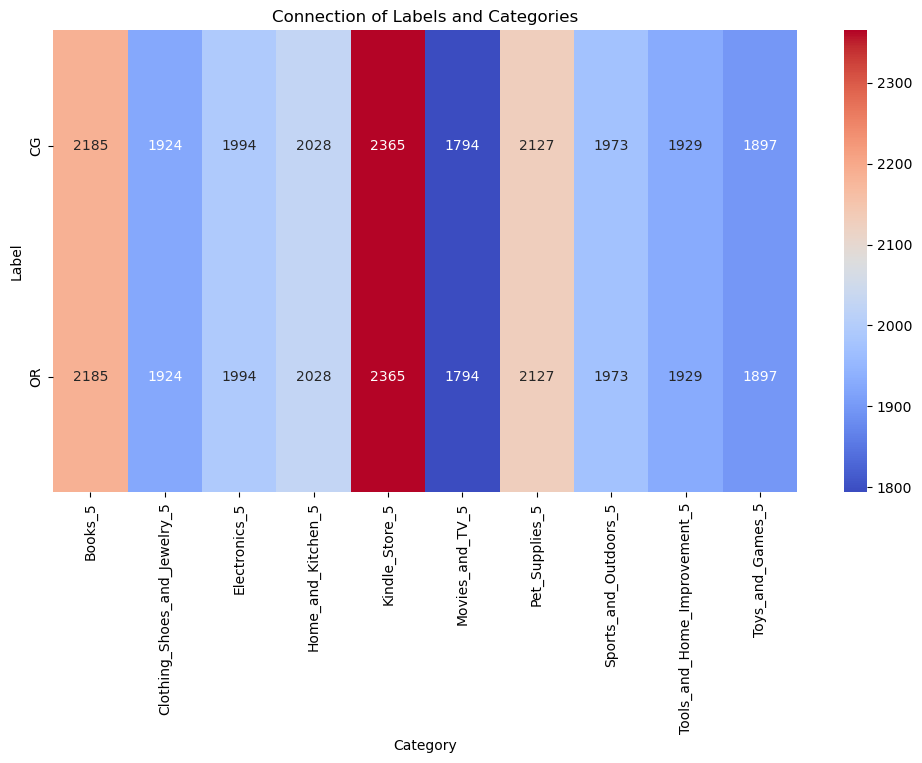

In [81]:
label_category_cross = pd.crosstab(df['label'], df['category'])

plt.figure(figsize=(12, 6))
sns.heatmap(label_category_cross, annot=True, fmt="d", cmap="coolwarm")
plt.title('Connection of Labels and Categories')
plt.xlabel('Category')
plt.ylabel('Label')
plt.xticks(rotation=90)
plt.show()